In [11]:
# %load tensor.py
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()

In [4]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28,28,1).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [16]:
X_train.shape

(60000, 28, 28, 1)

In [5]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [6]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [7]:
model_path = './data/model/MNIST_CNN.hdf5'
checkpointer = ModelCheckpoint(filepath=model_path, monitor= 'val_loss',
                               verbose = 1, save_best_only = True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [8]:
hist = model.fit(X_train, y_train, validation_split=0.25, epochs= 2000, batch_size= 200,
                 verbose = 0, callbacks = [early_stopping, checkpointer])



Epoch 1: val_loss improved from inf to 0.07660, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.07660 to 0.05810, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.05810 to 0.05289, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.05289 to 0.04602, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.04602 to 0.04157, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 6: val_loss did not improve from 0.04157

Epoch 7: val_loss improved from 0.04157 to 0.04039, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 8: val_loss did not improve from 0.04039

Epoch 9: val_loss did not improve from 0.04039

Epoch 10: val_loss did not improve from 0.04039

Epoch 11: val_loss did not improve from 0.04039

Epoch 12: val_loss did not improve from 0.04039

Epoch 13: val_loss did not improve from 0.04039

Epoch 14: val_loss did not improve from 0.04039

Epoch 15: val_loss did not impro

In [9]:
print("Test accuracy : ", model.evaluate(X_test, y_test)[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.0327 - accuracy: 0.9921
Test accuracy :  0.9921000003814697


In [12]:
y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']
x_len = np.arange(len(y_loss))

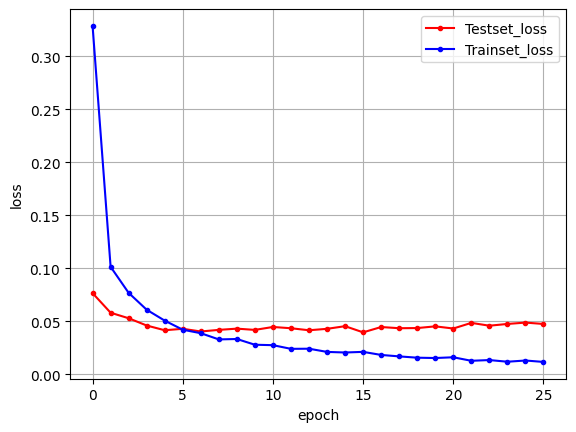

In [13]:
plt.plot(x_len, y_vloss, marker = '.', c='red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c='blue', label = 'Trainset_loss')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [14]:
X_test.shape

(10000, 28, 28, 1)

In [17]:
print(model.predict(X_test))

313/313 [==============================] - 2s 7ms/step
[[1.3278495e-17 4.7259410e-14 4.7827800e-14 ... 1.0000000e+00
  3.0518813e-20 8.4985445e-14]
 [6.9786956e-14 4.9088649e-09 1.0000000e+00 ... 1.2075174e-18
  1.5795995e-17 2.7886694e-18]
 [8.7839976e-15 1.0000000e+00 8.8522124e-12 ... 3.2402062e-10
  2.5052977e-11 4.7478801e-13]
 ...
 [8.0118661e-25 7.5836689e-15 4.5854731e-20 ... 1.1084531e-13
  2.7832003e-15 3.4082895e-13]
 [6.5580999e-19 1.6223039e-25 8.6756488e-27 ... 1.5869104e-21
  8.3448500e-12 1.9853073e-19]
 [3.4323130e-15 3.4364443e-20 1.6083966e-17 ... 5.2344021e-26
  3.0207998e-16 1.4965933e-21]]


In [18]:
pred = model.predict(X_test)

313/313 [==============================] - 2s 7ms/step


In [19]:
pred[0]

array([1.3278495e-17, 4.7259410e-14, 4.7827800e-14, 2.9161237e-15,
       3.3507032e-17, 1.2883116e-18, 2.3007757e-26, 1.0000000e+00,
       3.0518813e-20, 8.4985445e-14], dtype=float32)

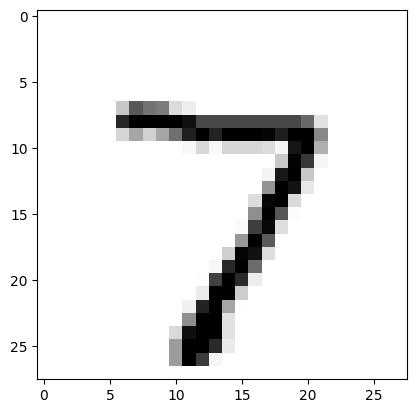

In [20]:
plt.imshow(X_test[0], cmap='Greys')
plt.show()